This is the project for Machine Learning at UA. 
First, we import the datasets into the notebook after we downloaded the files from the website.

## Data Import

In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

# read csv files
cleveland_df   = pd.read_csv("datasets/processed.cleveland.data", header=None, na_values =["?", -9.0])
switzerland_df = pd.read_csv("datasets/processed.switzerland.data", header=None, na_values =["?", -9.0])
va_df          = pd.read_csv("datasets/processed.va.data", header=None, na_values =["?", -9.0])
hungarian_df   = pd.read_csv("datasets/processed.hungarian.data", header=None, na_values =["?", -9.0])

Now we need to organize the data and add headers to the data frames. 

In [2]:
#add a column to keep track of the source of the data
cleveland_df["Source"] = "cleveland"
switzerland_df["Source"] = "switzerland"
va_df["Source"] = "va"
hungarian_df["Source"] = "hungarian"

In [3]:
# add headers to the data frames
headers = {0 : "age",
               1 : "sex",
               2 : "cp",
               3 : "trestbps",
               4 : "chol",
               5 : "fbs",
               6 : "restecg",
               7 : "thalach",
               8 : "exang",
               9 : "oldpeak",
               10 : "slope",
               11 : "ca",
               12 : "thal",
               13 : "diagnosis"}

cleveland_df = cleveland_df.rename(columns=headers)
switzerland_df = switzerland_df.rename(columns=headers)
va_df = va_df.rename(columns=headers)
hungarian_df = hungarian_df.rename(columns=headers)

Now we want to combine the different datasets from Cleveland, Switzerland, Va and Hungary into one big dataset. 

In [4]:
heart_disease_df = pd.concat([cleveland_df, switzerland_df, va_df, hungarian_df])

In [5]:
heart_disease_df['Source']

0      cleveland
1      cleveland
2      cleveland
3      cleveland
4      cleveland
         ...    
289    hungarian
290    hungarian
291    hungarian
292    hungarian
293    hungarian
Name: Source, Length: 920, dtype: object

Next, we want to look at some details of the dataset. 

In [6]:
print(heart_disease_df.head())
print(heart_disease_df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis     Source  
0    3.0  0.0   6.0          0  cleveland  
1    2.0  3.0   3.0          2  cleveland  
2    2.0  2.0   7.0          1  cleveland  
3    3.0  0.0   3.0          0  cleveland  
4    1.0  0.0   3.0          0  cleveland  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 293
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        920 non-null    float64
 1   sex        920 non-null    float64
 2   cp 

Next, let's use the command from the lecture to describe the data. 

In [7]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Let's collect some more information concerning the dataset. 


In [8]:
print(heart_disease_df.shape)
print(heart_disease_df.size)

(920, 15)
13800


Some more analytics. There are 920 observations with 15 14 features each, resulting in one diagnosis.

In [9]:
heart_disease_df.corr(method = 'pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000000,0.056889,0.166245,0.244253,-0.086234,0.233726,0.212719,-0.365778,0.201626,0.258243,0.155032,0.370416,0.137298,0.339596
sex,0.056889,1.000000,0.170392,0.001087,-0.197281,0.089191,-0.015612,-0.179320,0.181420,0.103930,0.125154,0.094123,0.373927,0.259342
cp,0.166245,0.170392,1.000000,0.025075,-0.132576,0.039838,0.031101,-0.349189,0.419384,0.244245,0.202989,0.214975,0.313150,0.397896
trestbps,0.244253,0.001087,0.025075,1.000000,0.092853,0.160235,0.098857,-0.104899,0.152328,0.161908,0.063387,0.093705,0.107555,0.122291
chol,-0.086234,-0.197281,-0.132576,0.092853,1.000000,0.024847,0.116494,0.236121,-0.034557,0.047734,-0.059276,0.051606,-0.179903,-0.231547
fbs,0.233726,0.089191,0.039838,0.160235,0.024847,1.000000,0.132347,-0.053386,0.029176,0.055277,0.092142,0.149539,0.105871,0.155533
restecg,0.212719,-0.015612,0.031101,0.098857,0.116494,0.132347,1.000000,0.053120,0.032331,0.118297,-0.014771,0.139154,-0.040084,0.140089
thalach,-0.365778,-0.179320,-0.349189,-0.104899,0.236121,-0.053386,0.053120,1.000000,-0.356439,-0.151174,-0.360622,-0.264094,-0.327360,-0.366265
exang,0.201626,0.181420,0.419384,0.152328,-0.034557,0.029176,0.032331,-0.356439,1.000000,0.392492,0.319424,0.127385,0.340737,0.388408
oldpeak,0.258243,0.103930,0.244245,0.161908,0.047734,0.055277,0.118297,-0.151174,0.392492,1.000000,0.421184,0.281817,0.254391,0.443084


Analyse the Pearson correlation coefficient, to find connections within the dataset. 

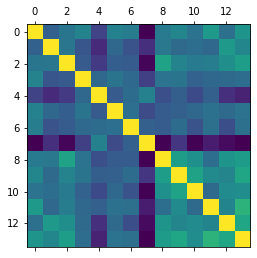

In [10]:
plt.matshow(heart_disease_df.corr())
plt.show()

In [11]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = heart_disease_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000000,0.056889,0.166245,0.244253,-0.086234,0.233726,0.212719,-0.365778,0.201626,0.258243,0.155032,0.370416,0.137298,0.339596
sex,0.056889,1.000000,0.170392,0.001087,-0.197281,0.089191,-0.015612,-0.179320,0.181420,0.103930,0.125154,0.094123,0.373927,0.259342
cp,0.166245,0.170392,1.000000,0.025075,-0.132576,0.039838,0.031101,-0.349189,0.419384,0.244245,0.202989,0.214975,0.313150,0.397896
trestbps,0.244253,0.001087,0.025075,1.000000,0.092853,0.160235,0.098857,-0.104899,0.152328,0.161908,0.063387,0.093705,0.107555,0.122291
chol,-0.086234,-0.197281,-0.132576,0.092853,1.000000,0.024847,0.116494,0.236121,-0.034557,0.047734,-0.059276,0.051606,-0.179903,-0.231547
fbs,0.233726,0.089191,0.039838,0.160235,0.024847,1.000000,0.132347,-0.053386,0.029176,0.055277,0.092142,0.149539,0.105871,0.155533
restecg,0.212719,-0.015612,0.031101,0.098857,0.116494,0.132347,1.000000,0.053120,0.032331,0.118297,-0.014771,0.139154,-0.040084,0.140089
thalach,-0.365778,-0.179320,-0.349189,-0.104899,0.236121,-0.053386,0.053120,1.000000,-0.356439,-0.151174,-0.360622,-0.264094,-0.327360,-0.366265
exang,0.201626,0.181420,0.419384,0.152328,-0.034557,0.029176,0.032331,-0.356439,1.000000,0.392492,0.319424,0.127385,0.340737,0.388408
oldpeak,0.258243,0.103930,0.244245,0.161908,0.047734,0.055277,0.118297,-0.151174,0.392492,1.000000,0.421184,0.281817,0.254391,0.443084


## Data Visualization

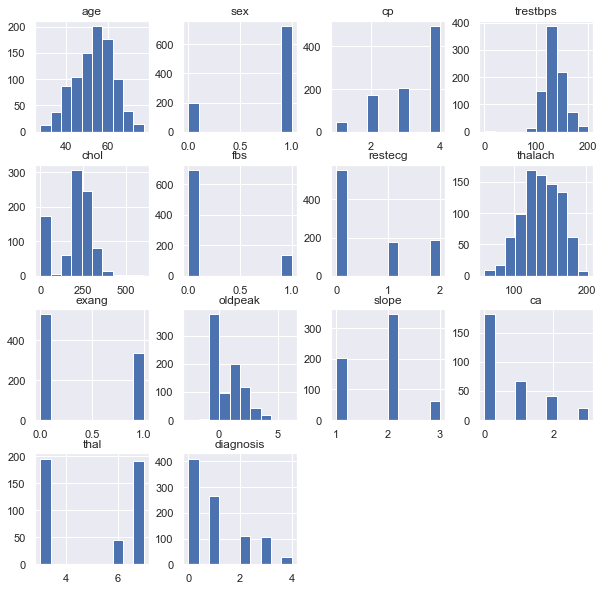

<Figure size 432x288 with 0 Axes>

In [12]:
sns.set()
heart_disease_df.hist(figsize=(10,10))
plt.show()
plt.savefig('heart_disease_hist.png', dpi=300, bbox_inches='tight')

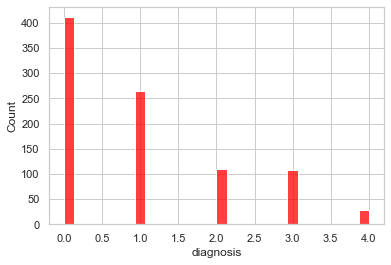

In [13]:
heart_disease_df.head()
sns.set_style('whitegrid')
sns.histplot(heart_disease_df['diagnosis'], kde = False, color ='red', bins = 30)
plt.savefig('diagnosis_distribution.png', dpi=300, bbox_inches='tight')


In [14]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(9, 9))
corr = heart_disease_df.corr().round(3) # round to 3 decimal places
# Format the correlation matrix to display only the last 3 numbers
corr_style = corr.style.format("{:.3f}")

# Apply a color map to the correlation matrix
corr_heatmap = corr_style.background_gradient(cmap='coolwarm')
corr_heatmap

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000,0.057,0.166,0.244,-0.086,0.234,0.213,-0.366,0.202,0.258,0.155,0.370,0.137,0.340
sex,0.057,1.000,0.170,0.001,-0.197,0.089,-0.016,-0.179,0.181,0.104,0.125,0.094,0.374,0.259
cp,0.166,0.170,1.000,0.025,-0.133,0.040,0.031,-0.349,0.419,0.244,0.203,0.215,0.313,0.398
trestbps,0.244,0.001,0.025,1.000,0.093,0.160,0.099,-0.105,0.152,0.162,0.063,0.094,0.108,0.122
chol,-0.086,-0.197,-0.133,0.093,1.000,0.025,0.116,0.236,-0.035,0.048,-0.059,0.052,-0.180,-0.232
fbs,0.234,0.089,0.040,0.160,0.025,1.000,0.132,-0.053,0.029,0.055,0.092,0.150,0.106,0.156
restecg,0.213,-0.016,0.031,0.099,0.116,0.132,1.000,0.053,0.032,0.118,-0.015,0.139,-0.040,0.140
thalach,-0.366,-0.179,-0.349,-0.105,0.236,-0.053,0.053,1.000,-0.356,-0.151,-0.361,-0.264,-0.327,-0.366
exang,0.202,0.181,0.419,0.152,-0.035,0.029,0.032,-0.356,1.000,0.392,0.319,0.127,0.341,0.388
oldpeak,0.258,0.104,0.244,0.162,0.048,0.055,0.118,-0.151,0.392,1.000,0.421,0.282,0.254,0.443


In [15]:
corr_matrix = heart_disease_df.corr()

corr_matrix.style.background_gradient(cmap='coolwarm')

nmbr_features = 10

top_correlations = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:nmbr_features+1]
print(top_correlations)

ca         0.516216
oldpeak    0.443084
thal       0.440438
cp         0.397896
exang      0.388408
thalach    0.366265
age        0.339596
slope      0.304835
sex        0.259342
chol       0.231547
Name: diagnosis, dtype: float64


In [16]:
visualize_data(heart_disease_df,'heart_disease')

NameError: name 'visualize_data' is not defined

In [ ]:
def plot_boxplots_just_one(df1):
    fig, ax = plt.subplots(figsize=(10, 4))

    df1 = (df1 - df1.mean()) / df1.std()

    # plot boxplot of the first DataFrame
    bp1 = df1.boxplot(ax=ax, color='blue')

    # set labels and title
    ax.set_xlabel('Variables')
    ax.set_ylabel('Values')
    ax.set_title('Boxplot of all variables')

    # create a legend
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper right')

    plt.show()

In [ ]:
plot_boxplots_just_one(heart_disease_df)

In [ ]:
sns.pairplot(data=heart_disease_df, hue='diagnosis', vars=['age'], ax=axes[0])

In [ ]:
heart_disease_df.describe()

In [17]:
heart_disease_df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
289    NaN
290    NaN
291    NaN
292    NaN
293    NaN
Name: ca, Length: 920, dtype: float64

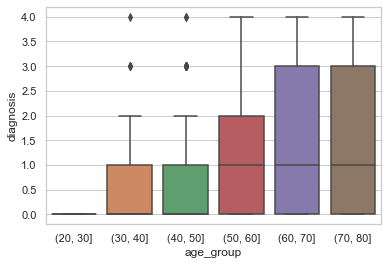

In [18]:
# Define the age ranges for grouping
age_bins = [20, 30, 40, 50, 60, 70, 80]

# Create a new column 'age_group' based on age bins
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=age_bins)

# Create the boxplot with age group on x-axis and diagnosis on y-axis
sns.boxplot(x='age_group', y='diagnosis', data=heart_disease_df)
heart_disease_df= heart_disease_df.drop('age_group', axis=1)

In [19]:
# Group the data by age and calculate the mean, median of a column for each group
# age_stats_df = heart_disease_df.groupby('age')['diagnosis'].agg(['mean', 'median']).reset_index()

# Plot the graph using seaborn lineplot
# sns.lineplot(x='age', y='mean', data=age_stats_df, label='Average')
#sns.lineplot(x='age', y='median', data=age_stats_df, label='Median')
#sns.lineplot(x='age', y='diagnosis', data=heart_disease_df, estimator=None, alpha=0.2, color='gray')

In [20]:
#sns.boxplot(x='ca',y='diagnosis',data=heart_disease_df)

## Plots for IEEE-Paper

### Only Cleveland Dataframe.

In [21]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


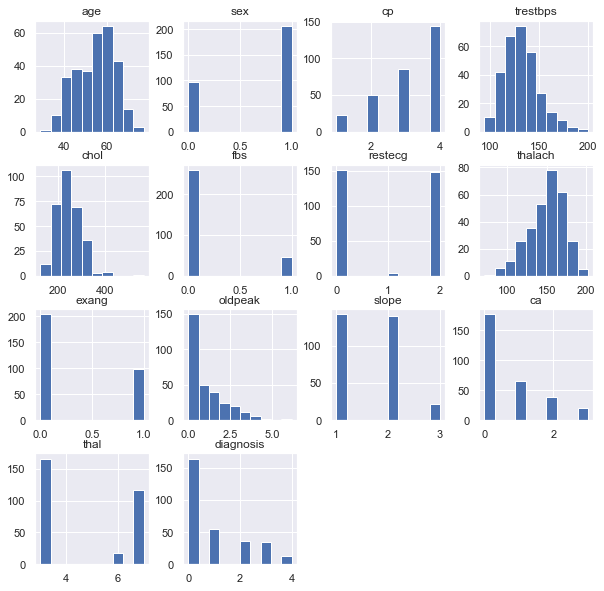

In [22]:
sns.set()
cleveland_df.hist(figsize=(10,10))
plt.savefig('heart_disease_hist.png', dpi=300, bbox_inches='tight')
plt.show()

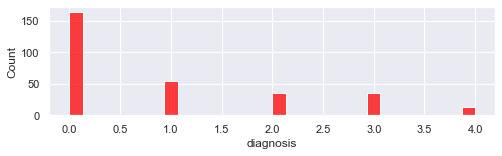

In [23]:
fig, ax = plt.subplots(figsize=(8, 2)) # Create a new figure with size (8, 2)
sns.set_style('whitegrid')
sns.histplot(cleveland_df['diagnosis'], kde=False, color='red', bins=30, ax=ax) # Add the plot to the specified axis
plt.savefig('diagnosis_distribution.png', dpi=300, bbox_inches='tight')

In [24]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(9, 9))
corr = cleveland_df.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000000,-0.098000,0.104000,0.285000,0.209000,0.119000,0.149000,-0.394000,0.092000,0.204000,0.162000,0.363000,0.127000,0.223000
sex,-0.098000,1.000000,0.010000,-0.064000,-0.200000,0.048000,0.022000,-0.049000,0.146000,0.102000,0.038000,0.093000,0.381000,0.224000
cp,0.104000,0.010000,1.000000,-0.036000,0.072000,-0.040000,0.068000,-0.334000,0.384000,0.202000,0.152000,0.233000,0.265000,0.407000
trestbps,0.285000,-0.064000,-0.036000,1.000000,0.130000,0.175000,0.147000,-0.045000,0.065000,0.189000,0.117000,0.099000,0.134000,0.158000
chol,0.209000,-0.200000,0.072000,0.130000,1.000000,0.010000,0.171000,-0.003000,0.061000,0.047000,-0.004000,0.119000,0.014000,0.071000
fbs,0.119000,0.048000,-0.040000,0.175000,0.010000,1.000000,0.070000,-0.008000,0.026000,0.006000,0.060000,0.145000,0.071000,0.059000
restecg,0.149000,0.022000,0.068000,0.147000,0.171000,0.070000,1.000000,-0.083000,0.085000,0.114000,0.134000,0.128000,0.025000,0.184000
thalach,-0.394000,-0.049000,-0.334000,-0.045000,-0.003000,-0.008000,-0.083000,1.000000,-0.378000,-0.343000,-0.386000,-0.264000,-0.280000,-0.415000
exang,0.092000,0.146000,0.384000,0.065000,0.061000,0.026000,0.085000,-0.378000,1.000000,0.288000,0.258000,0.146000,0.330000,0.397000
oldpeak,0.204000,0.102000,0.202000,0.189000,0.047000,0.006000,0.114000,-0.343000,0.288000,1.000000,0.578000,0.296000,0.341000,0.504000


In [25]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(9, 9))
corr = cleveland_df.corr().round(3) # round to 3 decimal places
# Format the correlation matrix to display only the last 3 numbers
corr_style = corr.style.format("{:.3f}")

# Apply a color map to the correlation matrix
corr_heatmap = corr_style.background_gradient(cmap='coolwarm')
corr_heatmap

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
age,1.000,-0.098,0.104,0.285,0.209,0.119,0.149,-0.394,0.092,0.204,0.162,0.363,0.127,0.223
sex,-0.098,1.000,0.010,-0.064,-0.200,0.048,0.022,-0.049,0.146,0.102,0.038,0.093,0.381,0.224
cp,0.104,0.010,1.000,-0.036,0.072,-0.040,0.068,-0.334,0.384,0.202,0.152,0.233,0.265,0.407
trestbps,0.285,-0.064,-0.036,1.000,0.130,0.175,0.147,-0.045,0.065,0.189,0.117,0.099,0.134,0.158
chol,0.209,-0.200,0.072,0.130,1.000,0.010,0.171,-0.003,0.061,0.047,-0.004,0.119,0.014,0.071
fbs,0.119,0.048,-0.040,0.175,0.010,1.000,0.070,-0.008,0.026,0.006,0.060,0.145,0.071,0.059
restecg,0.149,0.022,0.068,0.147,0.171,0.070,1.000,-0.083,0.085,0.114,0.134,0.128,0.025,0.184
thalach,-0.394,-0.049,-0.334,-0.045,-0.003,-0.008,-0.083,1.000,-0.378,-0.343,-0.386,-0.264,-0.280,-0.415
exang,0.092,0.146,0.384,0.065,0.061,0.026,0.085,-0.378,1.000,0.288,0.258,0.146,0.330,0.397
oldpeak,0.204,0.102,0.202,0.189,0.047,0.006,0.114,-0.343,0.288,1.000,0.578,0.296,0.341,0.504


In [26]:
corr_matrix = cleveland_df.corr()

corr_matrix.style.background_gradient(cmap='coolwarm')

nmbr_features = 10

top_correlations = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:nmbr_features+1]
print(top_correlations)

ca         0.518909
thal       0.509923
oldpeak    0.504092
thalach    0.415040
cp         0.407075
exang      0.397057
slope      0.377957
sex        0.224469
age        0.222853
restecg    0.183696
Name: diagnosis, dtype: float64


## Function for visualizing dataframes.

In [27]:
def visualize_data(df, name):
    
    df.describe()

    sns.set()
    df.hist(figsize=(10,10))
    plt.savefig(name+'_hist.png', dpi=300, bbox_inches='tight')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 2)) # Create a new figure with size (8, 2)
    sns.set_style('whitegrid')
    diagnosis = df['diagnosis'].apply(lambda x: 1 if x > 1 else x) # Replace values greater than 1 with 1    
    sns.histplot(diagnosis, kde=False, color='red', bins=30, ax=ax) # Add the plot to the specified axis
    plt.savefig(name+'_diagnosis_distribution.png', dpi=300, bbox_inches='tight')
    
    corr_matrix = df.corr()
    corr_matrix.style.background_gradient(cmap='coolwarm')
    nmbr_features = 5
    top_correlations = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:nmbr_features+1]
    print(top_correlations)

In [28]:
def visualize_data(df, name, df2=None):
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.set()
    df.hist(ax=ax, alpha=0.5, color='blue', label='df1', bins=30)
    if df2 is not None:
        df2.hist(ax=ax, alpha=0.5, color='green', label='df2', bins=30)
    ax.legend()
    plt.savefig(name+'_hist.png', dpi=300, bbox_inches='tight')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 2)) # Create a new figure with size (8, 2)
    sns.set_style('whitegrid')
    diagnosis = df['diagnosis'].apply(lambda x: 1 if x > 1 else x) # Replace values greater than 1 with 1    
    sns.histplot(diagnosis, kde=False, color='red', bins=30, ax=ax) # Add the plot to the specified axis
    plt.savefig(name+'_diagnosis_distribution.png', dpi=300, bbox_inches='tight')
    
    corr_matrix = df.corr()
    corr_matrix.style.background_gradient(cmap='coolwarm')
    nmbr_features = 5
    top_correlations = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:nmbr_features+1]
    print(top_correlations)

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/2667586597.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, alpha=0.5, color='blue', label='df1', bins=30)
/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/2667586597.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df2.hist(ax=ax, alpha=0.5, color='green', label='df2', bins=30)
No handles with labels found to put in legend.


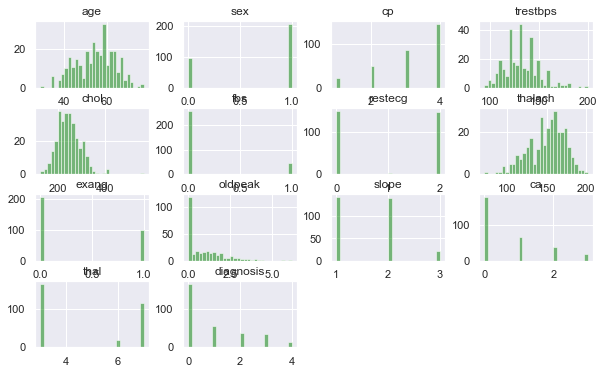

exang      0.583847
oldpeak    0.545700
slope      0.543420
thal       0.525711
cp         0.505864
Name: diagnosis, dtype: float64


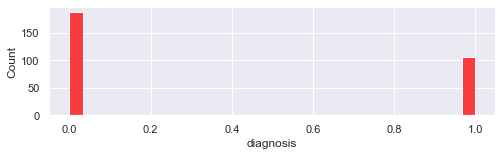

In [29]:
visualize_data(hungarian_df, 'hungarian', cleveland_df)

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/2667586597.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, alpha=0.5, color='blue', label='df1', bins=30)
No handles with labels found to put in legend.


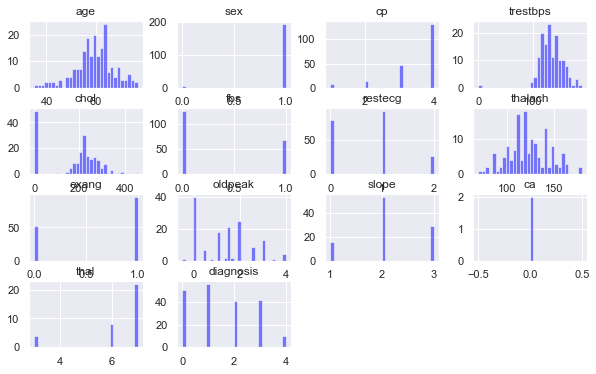

oldpeak     0.457514
exang       0.304296
age         0.287289
slope       0.175687
trestbps    0.172577
Name: diagnosis, dtype: float64


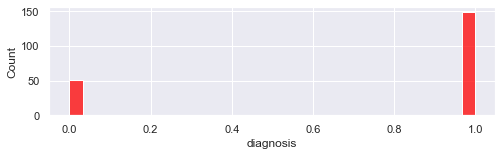

In [30]:
visualize_data(va_df,'va')

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/2667586597.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, alpha=0.5, color='blue', label='df1', bins=30)
No handles with labels found to put in legend.


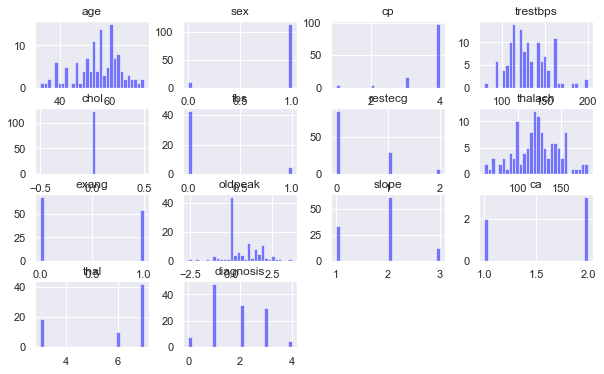

thalach    0.295579
ca         0.272166
cp         0.232277
fbs        0.210928
oldpeak    0.186790
Name: diagnosis, dtype: float64


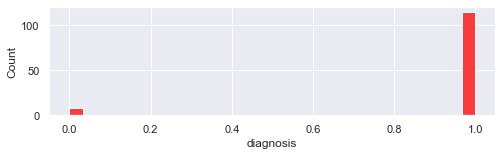

In [31]:
visualize_data(switzerland_df,'switzerland')

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/2667586597.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, alpha=0.5, color='blue', label='df1', bins=30)
No handles with labels found to put in legend.


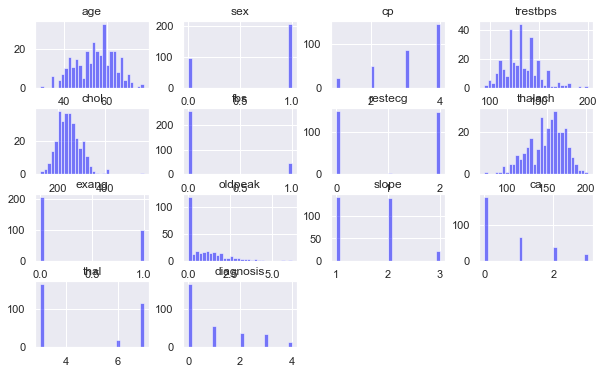

ca         0.518909
thal       0.509923
oldpeak    0.504092
thalach    0.415040
cp         0.407075
Name: diagnosis, dtype: float64


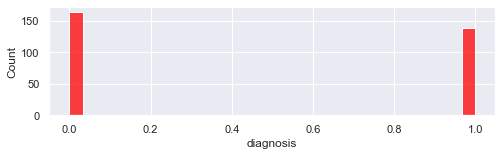

In [32]:
visualize_data(cleveland_df, 'cleveland')

Text(0.5, 1.0, 'Boxplot of all variables')

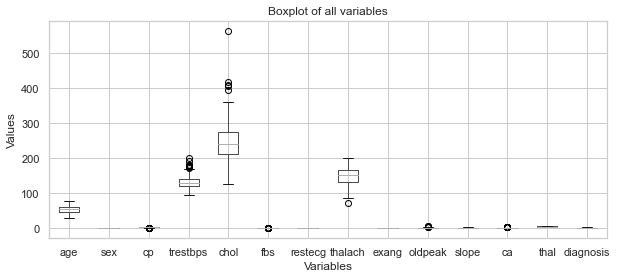

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
cleveland_df.boxplot(ax=ax)

# set labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot of all variables')

In [34]:
def plot_boxplots(df1, df2):
    fig, ax = plt.subplots(figsize=(10, 4))

    df1 = (df1 - df1.mean()) / df1.std()
    df2 = (df2 - df2.mean()) / df2.std()

    # plot boxplot of the first DataFrame
    bp1 = df1.boxplot(ax=ax, color='blue')

    # plot boxplot of the second DataFrame
    bp2 = df2.boxplot(ax=ax, color='red')

    # set labels and title
    ax.set_xlabel('Variables')
    ax.set_ylabel('Values')
    ax.set_title('Boxplot of all variables')

    # create a legend
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper right')

    plt.show()

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/1465492614.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = (df1 - df1.mean()) / df1.std()
/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/1465492614.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = (df2 - df2.mean()) / df2.std()


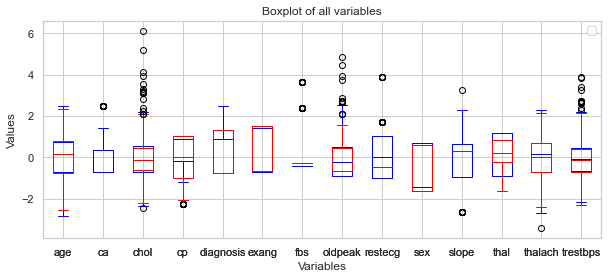

In [35]:
plot_boxplots(cleveland_df, hungarian_df)

/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/1465492614.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = (df1 - df1.mean()) / df1.std()
/var/folders/nr/clj_mgps3d96s0pnmjlzdf3w0000gn/T/ipykernel_17871/1465492614.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = (df2 - df2.mean()) / df2.std()


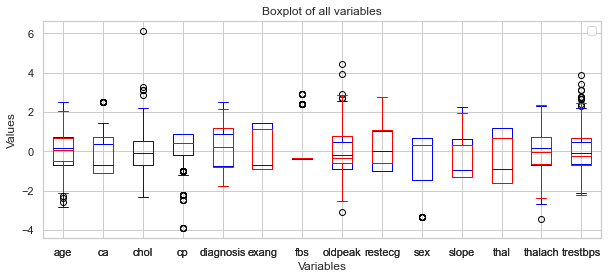

In [36]:
plot_boxplots(cleveland_df, switzerland_df)

In [37]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [38]:
switzerland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.104167,0.360656,121.557377,0.442623,0.653846,1.801887,1.600000,5.788732,1.804878
std,9.032108,0.274414,0.688726,22.559151,0.0,0.308709,0.590077,25.977438,0.498745,1.056061,0.623658,0.547723,1.731354,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.250000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


Text(0.5, 1.0, 'Boxplot of all variables')

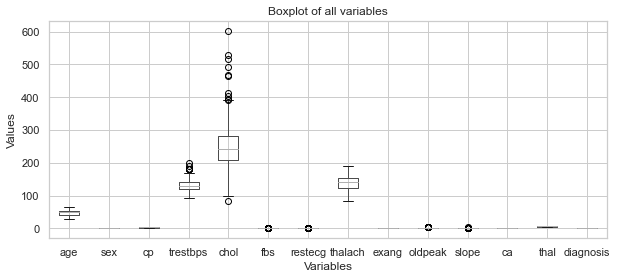

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
hungarian_df.boxplot(ax=ax)

# set labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot of all variables')

In [40]:
# access first row
desc = cleveland_df.describe()

row1 = desc.iloc[0]
row2 = desc.iloc[1]
row3 = desc.iloc[2]

print(row1)
print(row2)
print(row3)

age          303.0
sex          303.0
cp           303.0
trestbps     303.0
chol         303.0
fbs          303.0
restecg      303.0
thalach      303.0
exang        303.0
oldpeak      303.0
slope        303.0
ca           299.0
thal         301.0
diagnosis    303.0
Name: count, dtype: float64
age           54.438944
sex            0.679868
cp             3.158416
trestbps     131.689769
chol         246.693069
fbs            0.148515
restecg        0.990099
thalach      149.607261
exang          0.326733
oldpeak        1.039604
slope          1.600660
ca             0.672241
thal           4.734219
diagnosis      0.937294
Name: mean, dtype: float64
age           9.038662
sex           0.467299
cp            0.960126
trestbps     17.599748
chol         51.776918
fbs           0.356198
restecg       0.994971
thalach      22.875003
exang         0.469794
oldpeak       1.161075
slope         0.616226
ca            0.937438
thal          1.939706
diagnosis     1.228536
Name: std, dtype: flo

## Pre-Processing

In [41]:
import os
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import numpy as np
from sklearn.impute import SimpleImputer 

In [42]:
CONTINUOUS_FACTORS = ["age", "chol", "oldpeak", "thalach", "trestbps"]
DISCRETE_FACTORS = ["ca", "cp", "exang", "fbs", "restecg", "sex", "slope", "thal"]
TARGET = ["diagnosis"]

def pipeline(df):
    Y = df[TARGET + ["Source"]].copy()
    X = df[CONTINUOUS_FACTORS + DISCRETE_FACTORS + ["Source"]].copy()
    
    # Handle the discrete and continuous variables seperatly
    X_continuous = X[CONTINUOUS_FACTORS]
    X_discrete = X[DISCRETE_FACTORS].fillna(value=5) #For all the discrete values, replace missing values with 5
    
     # For continuous variables, replace missing values with the median and then normalize by subtracting the mean and dividing by the standard deviation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')

    continuous_Pipeline = sklearn.pipeline.Pipeline( [("imputer", sklearn.impute.SimpleImputer(strategy="median")),
                                             ("scaler", sklearn.preprocessing.StandardScaler())
                                            ]
                                           )
    X_continuous_scaled = continuous_Pipeline.fit_transform(X_continuous)
    
    # for discrete variables, one-hot encode the data
    discrete_Pipeline = sklearn.pipeline.Pipeline( [("one_hot", sklearn.preprocessing.OneHotEncoder(handle_unknown ='ignore'))
                                            ]
                                           )
    X_discrete_one_hot = discrete_Pipeline.fit_transform(X_discrete)
    
    X_fully_preprocessed = np.concatenate((X_continuous_scaled, X_discrete_one_hot.toarray()), axis = 1)
    X_fully_preprocessed = np.hstack((X_fully_preprocessed, X[["Source"]].values))

    # Create a binary target variable indicating presence or absence of heart disease and add "Source" column
    Y_binary = Y.copy()
    Y_binary["diagnosis"] = (Y_binary["diagnosis"] > 0).astype(int) # Convert diagnosis to binary values

    return X_fully_preprocessed, Y_binary

In [43]:
X, Y = pipeline(heart_disease_df)
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))

(920, 35)
(920, 2)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [44]:
def extract_dataset(X, Y, dataset_name):
    X_dataset = X[X[:, -1] == dataset_name]
    X_dataset = X_dataset[:, :-1]
    Y_dataset = Y.copy()
    Y_dataset = Y_dataset[Y_dataset["Source"] == dataset_name]
    Y_dataset = Y_dataset.drop("Source", axis=1)
    return X_dataset, Y_dataset.values

def drop_source(X, Y):
    X = X[:, :-1]
    Y = Y.drop("Source", axis=1)
    return X, Y.values

In [45]:
X_cleveland, Y_cleveland = extract_dataset(X, Y, "cleveland")
X_switzerland, Y_switzerland = extract_dataset(X, Y, "switzerland")
X_va, Y_va = extract_dataset(X, Y, "va")
X_hungarian, Y_hungarian = extract_dataset(X, Y, "hungarian")
X, Y = drop_source(X, Y)

In [46]:
print(X_cleveland.shape, Y_cleveland.shape)
print(X_switzerland.shape, Y_switzerland.shape)
print(X_va.shape, Y_va.shape)
print(X_hungarian.shape, Y_hungarian.shape)
print(X.shape, Y.shape)

(303, 34) (303, 1)
(123, 34) (123, 1)
(200, 34) (200, 1)
(294, 34) (294, 1)
(920, 34) (920, 1)


Preprocessing done. There are two datasets: trainY_binary and trainY. 

# Train models for full dataset

### Linear Regression

Let's write 2 helper functions of calculating and printing evaluation metrics.

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print the evaluation metrics
def print_evaluation_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate and print the classification metrics
def print_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

In [49]:
from sklearn.linear_model import LinearRegression

def linear_regression(trainX, trainY, testX, testY, verbose=True):
    # Create a linear regression model
    linear_reg = LinearRegression()

    # Fit the model to the training data
    linear_reg.fit(trainX, trainY)

    # Predict the target values for the test data
    testY_pred = linear_reg.predict(testX)

    # Since linear regression returns continuous values, we need to convert the predictions into binary classification
    lin_testY_pred_binary = (testY_pred >= 0.5).astype(int)

    # Calculate and print the evaluation and classification metrics
    if verbose:
        print_evaluation_metrics(testY, testY_pred)
        print_classification_metrics(testY, lin_testY_pred_binary)
    
    return linear_reg, lin_testY_pred_binary

Next, we try to optimise the type of the regularization and the regularization strength .

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

def linear_regression_optimization(trainX, trainY, testX, testY, params, verbose=True):
    # Create Ridge and Lasso models
    ridge = Ridge()
    lasso = Lasso()

    # Create GridSearchCV objects for Ridge and Lasso
    ridge_grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
    lasso_grid = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

    # Fit the GridSearchCV objects to the training data
    ridge_grid.fit(trainX, trainY)
    lasso_grid.fit(trainX, trainY)

    # Get the best hyperparameters and models
    best_ridge_params = ridge_grid.best_params_
    best_lasso_params = lasso_grid.best_params_
    best_ridge_model = ridge_grid.best_estimator_
    best_lasso_model = lasso_grid.best_estimator_

    if verbose:
        print(f'Best Ridge parameters: {best_ridge_params}')
        print(f'Best Lasso parameters: {best_lasso_params}')
    
    # Make predictions using the best Ridge and Lasso models
    ridge_testY_pred = best_ridge_model.predict(testX)
    lasso_testY_pred = best_lasso_model.predict(testX)

    # Convert the continuous predictions into binary classification
    ridge_testY_pred_binary = (ridge_testY_pred >= 0.5).astype(int)
    lasso_testY_pred_binary = (lasso_testY_pred >= 0.5).astype(int)

    if verbose:
        # Calculate and print the evaluation metrics for Ridge model
        print("Ridge Model:")
        print_evaluation_metrics(testY, ridge_testY_pred)
        print_classification_metrics(testY, ridge_testY_pred_binary)

        # Calculate and print the evaluation metrics for Lasso model
        print("\nLasso Model:")
        print_evaluation_metrics(testY, lasso_testY_pred)
        print_classification_metrics(testY, lasso_testY_pred_binary)
    
    return best_ridge_model, ridge_testY_pred_binary, best_lasso_model, lasso_testY_pred_binary

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(trainX, trainY, testX, testY, verbose=True):
    # Create a logistic regression model
    logistic_reg = LogisticRegression(max_iter=10000)

    # Fit the model to the training data
    logistic_reg.fit(trainX, trainY.ravel())
    
    # Predict the target values for the test data
    testY_pred = logistic_reg.predict(testX)

    # Calculate and print the evaluation metrics
    if verbose:
        print_classification_metrics(testY, testY_pred)
    
    return logistic_reg, testY_pred

In [52]:
def logistic_regression_optimization(trainX, trainY, testX, testY, params, verbose=True):
    # Create a logistic regression model
    logistic_reg = LogisticRegression(max_iter=10000)

    # Create a GridSearchCV object for logistic regression
    logistic_grid = GridSearchCV(logistic_reg, params, scoring='accuracy', cv=5)

    # Fit the GridSearchCV object to the training data
    logistic_grid.fit(trainX, trainY.ravel())

    # Get the best hyperparameters and model
    best_logistic_params = logistic_grid.best_params_
    best_logistic_model = logistic_grid.best_estimator_
    
    logistic_testY_pred = best_logistic_model.predict(testX)

    if verbose:
        print(f'Best logistic regression parameters: {best_logistic_params}')
        print_classification_metrics(testY, logistic_testY_pred)
    
    return best_logistic_model, logistic_testY_pred

### Support Vector Machines


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

def svm(trainX, trainY, testX, testY, verbose=True):
    # Create a Support vector model
    svm = SVC()

    # Fit the model to the training data
    svm.fit(trainX, trainY.ravel())

    # Predict the target values for the test data
    testY_pred = svm.predict(testX)

    # Calculate and print the evaluation metrics
    if verbose:
        print_classification_metrics(testY, testY_pred)
    
    return svm, testY_pred

In [54]:
from sklearn.model_selection import GridSearchCV

def svm_optimization(trainX, trainY, testX, testY, params, verbose=True):
    # Create a Support vector model
    svm = SVC()

    # Create a GridSearchCV object for SVM
    svm_grid = GridSearchCV(svm, params, scoring='accuracy', cv=5)

    # Fit the GridSearchCV object to the training data
    svm_grid.fit(trainX, trainY.ravel())

    # Get the best hyperparameters and model
    best_svm_params = svm_grid.best_params_
    best_svm_model = svm_grid.best_estimator_

    if verbose:
        print(f'Best SVM parameters: {best_svm_params}')
    
    svm_testY_pred = best_svm_model.predict(testX)
    if verbose:
        print('Testing predictions:')
        print_classification_metrics(testY, svm_testY_pred)

    svm_trainY_pred = best_svm_model.predict(trainX)
    if verbose:
        print('Training predictions:')
        print_classification_metrics(trainY, svm_trainY_pred)

    return best_svm_model, svm_testY_pred

### Neural Network classifier

In [55]:
from sklearn.neural_network import MLPClassifier

def nn(trainX, trainY, testX, testY, verbose=True):
    # Create a neural network classifier model
    mlp = MLPClassifier(max_iter = 10000, solver = 'adam')

    # Fit the model to the training data
    mlp.fit(trainX, trainY.ravel())

    # Predict the target values for the test data
    testY_pred_nn = mlp.predict(testX)

    # Calculate and print the evaluation metrics
    if verbose:
        print_classification_metrics(testY, testY_pred_nn)
    
    return mlp, testY_pred_nn

In [56]:
from sklearn.model_selection import GridSearchCV

def nn_optimization(trainX, trainY, testX, testY, params, verbose=True):
    # Create a neural network classifier model
    mlp = MLPClassifier(max_iter = 10000, solver = 'adam')

    # Create a GridSearchCV object for the neural network classifier
    mlp_grid = GridSearchCV(mlp, params, scoring='accuracy', cv=5)

    # Fit the GridSearchCV object to the training data
    mlp_grid.fit(trainX, trainY.ravel())

    # Get the best hyperparameters and model
    best_mlp_params = mlp_grid.best_params_
    best_mlp_model = mlp_grid.best_estimator_
    
    if verbose:
        print("Best NN parameters:" + str(best_mlp_params))
    
    neural_network_testY_pred = best_mlp_model.predict(testX)
    if verbose:
        print('Testing predictions:')
        print_classification_metrics(testY, neural_network_testY_pred)
    
    neural_network_trainY_pred = best_mlp_model.predict(trainX)
    if verbose:
        print('Training predictions:')
        print_classification_metrics(trainY, neural_network_trainY_pred)
    
    return best_mlp_model, neural_network_testY_pred

## Helper functions for analyzing dataset

In [67]:
def linear_regression_complete(trainX, trainY, testX, testY, params, verbose=True):
    if verbose:
        print("LINEAR REGRESSION:")
    model, testY_pred = linear_regression(trainX, trainY, testX, testY, verbose)
    
    if verbose:
        print("\nLINEAR REGRESSION - HYPERPARAMETERS OPTIMIZATION:")
        
    model_ridge, testY_pred_ridge, model_lasso, testY_pred_lasso = linear_regression_optimization(trainX, trainY, testX, testY, params, verbose)
    
    return model, testY_pred, model_ridge, testY_pred_ridge, model_lasso, testY_pred_lasso

In [68]:
def logistic_regression_complete(trainX, trainY, testX, testY, params, verbose=True):
    if verbose:
        print("\nLOGISTIC REGRESSION:")
    model, testY_pred = logistic_regression(trainX, trainY, testX, testY, verbose)

    if verbose:
        print("\nLOGISTIC REGRESSION - HYPERPARAMETERS OPTIMIZATION:")
    
    model_opt, testY_pred_opt = logistic_regression_optimization(trainX, trainY, testX, testY, params, verbose)
    
    return model, testY_pred, model_opt, testY_pred_opt

In [78]:
def svm_complete(trainX, trainY, testX, testY, params, verbose=True):
    if verbose:
        print("\nSVM:")
    model, testY_pred = svm(trainX, trainY, testX, testY, verbose)

    if verbose:
        print("\nSVM - HYPERPARAMETERS OPTIMIZATION:")
    
    model_opt, testY_pred_opt = svm_optimization(trainX, trainY, testX, testY, params, verbose)
    
    return model, testY_pred, model_opt, testY_pred_opt

In [79]:
def nn_complete(trainX, trainY, testX, testY, params, verbose=True):
    if verbose:
        print("\nNEURAL NETWORKS:")
    model, testY_pred = nn(trainX, trainY, testX, testY, verbose)

    if verbose:
        print("\nNEURAL NETWORKS - HYPERPARAMETERS OPTIMIZATION:")
    
    model_opt, testY_pred_opt = nn_optimization(trainX, trainY, testX, testY, params, verbose)
    
    return model, testY_pred, model_opt, testY_pred_opt

In [80]:
def evaluate_classification_model(testY, predY):
    acc = accuracy_score(testY, predY)
    prec = precision_score(testY, predY)
    rec = recall_score(testY, predY)
    f1 = f1_score(testY, predY)
    roc_auc = roc_auc_score(testY, predY)
    
    return {'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'ROC AUC Score': roc_auc}

In [81]:
def print_model_evaluation(testY, testY_pred_lin, testY_pred_ridge, testY_pred_lasso, testY_pred_log, testY_pred_svm, testY_pred_nn):
    # Evaluation metrics dictionary for each model
    linear_metrics = evaluate_classification_model(testY, testY_pred_lin)
    lasso_metrics = evaluate_classification_model(testY, testY_pred_lasso)
    ridge_metrics = evaluate_classification_model(testY, testY_pred_ridge)
    logistic_metrics = evaluate_classification_model(testY, testY_pred_log)
    svm_metrics = evaluate_classification_model(testY, testY_pred_svm)
    nn_metrics = evaluate_classification_model(testY, testY_pred_nn)

    # Create a pandas DataFrame for the evaluation metrics
    results = pd.DataFrame({'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression', 'Logistic Regression', 'SVM', 'Neural Network'],
                   'Accuracy': [linear_metrics['Accuracy'], lasso_metrics['Accuracy'], ridge_metrics['Accuracy'], logistic_metrics['Accuracy'], svm_metrics['Accuracy'], nn_metrics['Accuracy']],
                   'Precision': [linear_metrics['Precision'], lasso_metrics['Precision'], ridge_metrics['Precision'], logistic_metrics['Precision'], svm_metrics['Precision'], nn_metrics['Precision']],
                   'Recall': [linear_metrics['Recall'], lasso_metrics['Recall'], ridge_metrics['Recall'], logistic_metrics['Recall'], svm_metrics['Recall'], nn_metrics['Recall']],
                   'F1 Score': [linear_metrics['F1 Score'], lasso_metrics['F1 Score'], ridge_metrics['F1 Score'], logistic_metrics['F1 Score'], svm_metrics['F1 Score'], nn_metrics['F1 Score']],
                   'ROC AUC Score': [linear_metrics['ROC AUC Score'], lasso_metrics['ROC AUC Score'], ridge_metrics['ROC AUC Score'], logistic_metrics['ROC AUC Score'], svm_metrics['ROC AUC Score'], nn_metrics['ROC AUC Score']]})


    df = pd.DataFrame(results)
    print(df)

In [82]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(cm, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
    
    plt.savefig(name+'.png')
    plt.show()
    plt.clf()

In [83]:
def generate_confusion_matrices(testY, testY_pred_lin, testY_pred_ridge, testY_pred_lasso, testY_pred_log, testY_pred_svm, testY_pred_nn):
    cm_lin = confusion_matrix(testY, testY_pred_lin)
    cm_ridge = confusion_matrix(testY, testY_pred_ridge)
    cm_lasso = confusion_matrix(testY, testY_pred_lasso)
    cm_log = confusion_matrix(testY, testY_pred_log)
    cm_svm = confusion_matrix(testY, testY_pred_svm)
    cm_nn = confusion_matrix(testY, testY_pred_nn)
    
    generate_confusion_matrix(cm_lin, 'cm_lin')
    generate_confusion_matrix(cm_ridge, 'cm_ridge')
    generate_confusion_matrix(cm_lasso, 'cm_lasso')
    generate_confusion_matrix(cm_log, 'cm_log')
    generate_confusion_matrix(cm_svm, 'cm_svm')
    generate_confusion_matrix(cm_nn, 'cm_nn')

In [84]:
def analyze_dataset(trainX, trainY, testX, testY, lin_params, log_params, svm_params, nn_params, verbose, print_evaluation, generate_cns):
    model_lin, testY_pred_lin, model_ridge, testY_pred_ridge, model_lasso, testY_pred_lasso = linear_regression_complete(trainX, trainY, testX, testY, lin_params, verbose)
    _, _, model_log, testY_pred_log = logistic_regression_complete(trainX, trainY, testX, testY, log_params, verbose)
    _, _, model_svm, testY_pred_svm = svm_complete(trainX, trainY, testX, testY, svm_params, verbose)
    _, _, model_nn, testY_pred_nn = nn_complete(trainX, trainY, testX, testY, nn_params, verbose)
    
    if print_evaluation:
        print_model_evaluation(testY, testY_pred_lin, testY_pred_ridge, testY_pred_lasso, testY_pred_log, testY_pred_svm, testY_pred_nn)
        
    if generate_cns:
        generate_confusion_matrices(testY, testY_pred_lin, testY_pred_ridge, testY_pred_lasso, testY_pred_log, testY_pred_svm, testY_pred_nn)

## Analytics

In [ ]:
#analyze_dataset(X_cleveland, Y_cleveland, X_hungarian, Y_hungarian)

In [85]:
# Define the hyperparameters to optimize
lin_params = {
    'alpha': np.logspace(-4, 4, 9)  # Regularization strength
}

log_params = {
 'C': np.logspace(-4, 4, 18),  # Inverse of regularization strength
    #'solver': ['lbfgs', 'newton-cg', 'sag'],
    #'penalty': ['l2', 'none']
}

svm_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel function
    'gamma': ['scale', 'auto'],  # Kernel coefficient for rbf, poly and sigmoid
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function
}

nn_params = {
    'hidden_layer_sizes': [(5,), (17,), (5, 5), (34,), (34, 17, 7)],  # Number of neurons in each hidden layer
    'activation': ['logistic', 'relu'],  # Activation function for the hidden layer
    #'solver': ['adam', 'sgd'],  # Optimizer for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedule for weight updates
}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

LINEAR REGRESSION:
Mean Squared Error: 0.1309
R-squared: 0.4760
Accuracy: 0.8315
Precision: 0.8119
Recall: 0.8723
F1 Score: 0.8410
ROC AUC Score: 0.8306

LINEAR REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best Ridge parameters: {'alpha': 10.0}
Best Lasso parameters: {'alpha': 0.001}
Ridge Model:
Mean Squared Error: 0.1304
R-squared: 0.4782
Accuracy: 0.8261
Precision: 0.8100
Recall: 0.8617
F1 Score: 0.8351
ROC AUC Score: 0.8253

Lasso Model:
Mean Squared Error: 0.1297
R-squared: 0.4809
Accuracy: 0.8261
Precision: 0.8100
Recall: 0.8617
F1 Score: 0.8351
ROC AUC Score: 0.8253

LOGISTIC REGRESSION:
Accuracy: 0.8261
Precision: 0.8100
Recall: 0.8617
F1 Score: 0.8351
ROC AUC Score: 0.8253

LOGISTIC REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best logistic regression parameters: {'C': 0.06660846290809154}
Accuracy: 0.8152
Precision: 0.7941
Recall: 0.8617
F1 Score: 0.8265
ROC AUC Score: 0.8142

SVM:
Accuracy: 0.8315
Precision: 0.7890
Recall: 0.9149
F1 Score: 0.8473
ROC AUC Score: 0.8297

SVM - HYP

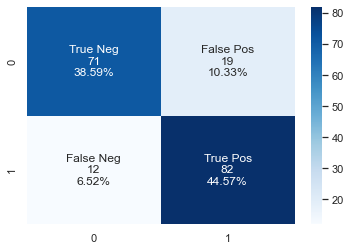

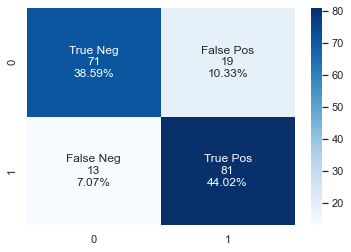

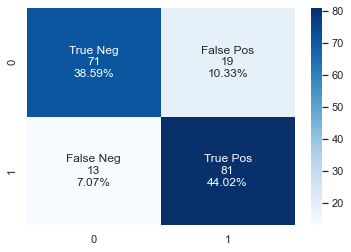

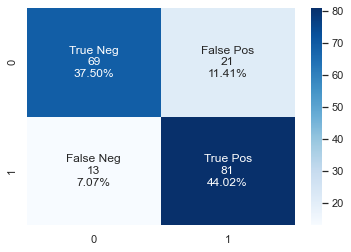

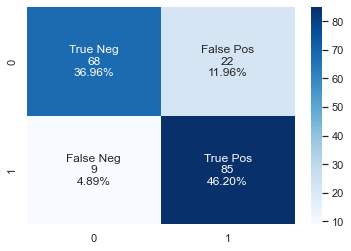

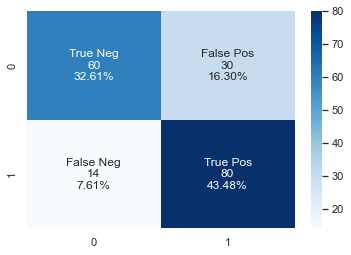

<Figure size 432x288 with 0 Axes>

In [66]:
import warnings

# Suppress UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

analyze_dataset(X_train, Y_train, X_test, Y_test, lin_params, log_params, svm_params, nn_params, True, True, True)

LINEAR REGRESSION:
Mean Squared Error: 0.2864
R-squared: -3.7091
Accuracy: 0.5610
Precision: 0.9692
Recall: 0.5478
F1 Score: 0.7000
ROC AUC Score: 0.6489

LINEAR REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best Ridge parameters: {'alpha': 10.0}
Best Lasso parameters: {'alpha': 0.01}
Ridge Model:
Mean Squared Error: 0.2016
R-squared: -2.3145
Accuracy: 0.6911
Precision: 0.9753
Recall: 0.6870
F1 Score: 0.8061
ROC AUC Score: 0.7185

Lasso Model:
Mean Squared Error: 0.1009
R-squared: -0.6588
Accuracy: 0.8862
Precision: 0.9550
Recall: 0.9217
F1 Score: 0.9381
ROC AUC Score: 0.6484

LOGISTIC REGRESSION:
Accuracy: 0.6341
Precision: 0.9861
Recall: 0.6174
F1 Score: 0.7594
ROC AUC Score: 0.7462

LOGISTIC REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best logistic regression parameters: {'C': 0.06660846290809154}
Accuracy: 0.7154
Precision: 0.9545
Recall: 0.7304
F1 Score: 0.8276
ROC AUC Score: 0.6152

SVM:
Accuracy: 0.8537
Precision: 0.9709
Recall: 0.8696
F1 Score: 0.9174
ROC AUC Score: 0.7473

SVM - H

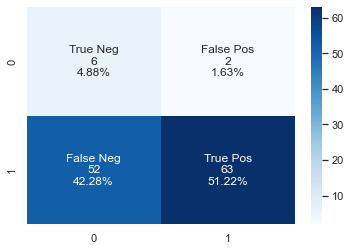

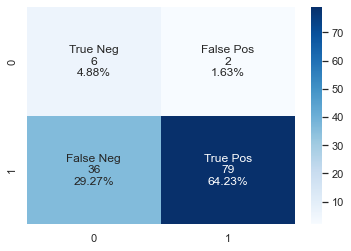

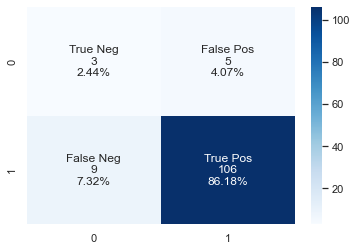

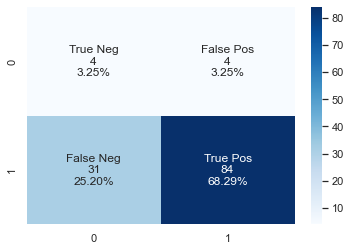

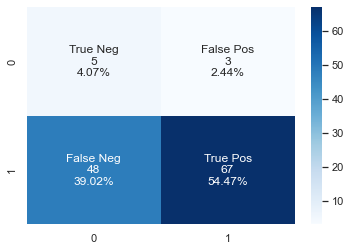

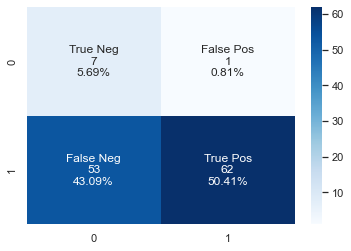

<Figure size 432x288 with 0 Axes>

In [86]:
# Suppress UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

analyze_dataset(X_cleveland, Y_cleveland, X_switzerland, Y_switzerland, lin_params, log_params, svm_params, nn_params, True, True, True)

LINEAR REGRESSION:
Mean Squared Error: 0.1996
R-squared: -0.0506
Accuracy: 0.7050
Precision: 0.8082
Recall: 0.7919
F1 Score: 0.8000
ROC AUC Score: 0.6215

LINEAR REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best Ridge parameters: {'alpha': 10.0}
Best Lasso parameters: {'alpha': 0.01}
Ridge Model:
Mean Squared Error: 0.1854
R-squared: 0.0240
Accuracy: 0.7200
Precision: 0.8163
Recall: 0.8054
F1 Score: 0.8108
ROC AUC Score: 0.6380

Lasso Model:
Mean Squared Error: 0.1676
R-squared: 0.1176
Accuracy: 0.7700
Precision: 0.7725
Recall: 0.9799
F1 Score: 0.8639
ROC AUC Score: 0.5684

LOGISTIC REGRESSION:
Accuracy: 0.6950
Precision: 0.8056
Recall: 0.7785
F1 Score: 0.7918
ROC AUC Score: 0.6148

LOGISTIC REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best logistic regression parameters: {'C': 0.06660846290809154}
Accuracy: 0.7150
Precision: 0.7875
Recall: 0.8456
F1 Score: 0.8155
ROC AUC Score: 0.5895

SVM:
Accuracy: 0.7500
Precision: 0.8037
Recall: 0.8792
F1 Score: 0.8397
ROC AUC Score: 0.6259

SVM - HYP

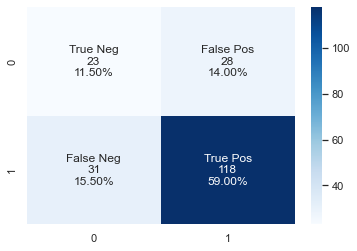

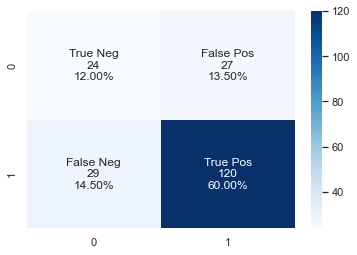

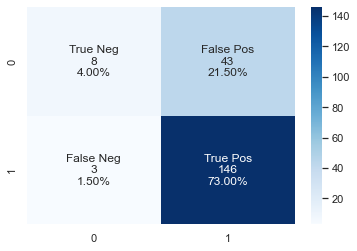

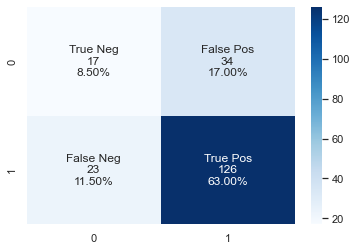

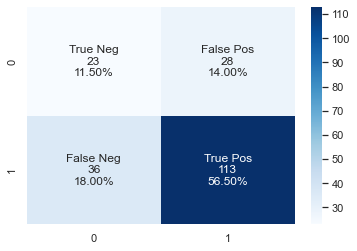

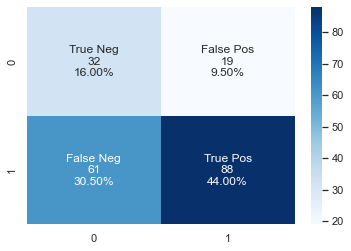

<Figure size 432x288 with 0 Axes>

In [87]:
analyze_dataset(X_cleveland, Y_cleveland, X_va, Y_va, lin_params, log_params, svm_params, nn_params, True, True, True)

LINEAR REGRESSION:
Mean Squared Error: 0.1672
R-squared: 0.2749
Accuracy: 0.7993
Precision: 0.6767
Recall: 0.8491
F1 Score: 0.7531
ROC AUC Score: 0.8102

LINEAR REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best Ridge parameters: {'alpha': 10.0}
Best Lasso parameters: {'alpha': 0.01}
Ridge Model:
Mean Squared Error: 0.1595
R-squared: 0.3080
Accuracy: 0.8095
Precision: 0.6894
Recall: 0.8585
F1 Score: 0.7647
ROC AUC Score: 0.8202

Lasso Model:
Mean Squared Error: 0.1799
R-squared: 0.2195
Accuracy: 0.7653
Precision: 0.6194
Recall: 0.9057
F1 Score: 0.7356
ROC AUC Score: 0.7959

LOGISTIC REGRESSION:
Accuracy: 0.7891
Precision: 0.6618
Recall: 0.8491
F1 Score: 0.7438
ROC AUC Score: 0.8022

LOGISTIC REGRESSION - HYPERPARAMETERS OPTIMIZATION:
Best logistic regression parameters: {'C': 0.06660846290809154}
Accuracy: 0.8163
Precision: 0.7097
Recall: 0.8302
F1 Score: 0.7652
ROC AUC Score: 0.8193

SVM:
Accuracy: 0.7857
Precision: 0.6463
Recall: 0.8962
F1 Score: 0.7510
ROC AUC Score: 0.8098

SVM - HYPE

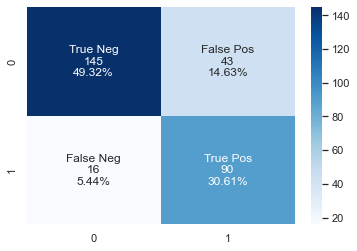

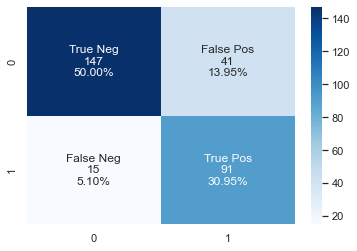

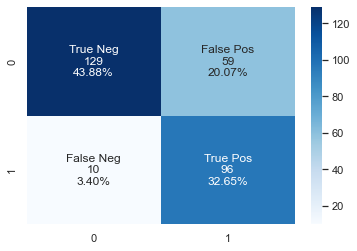

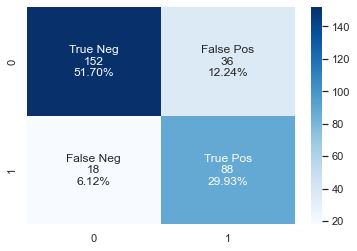

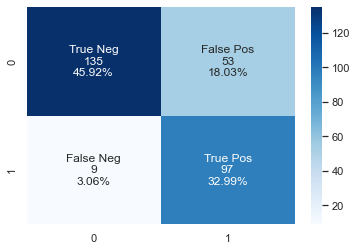

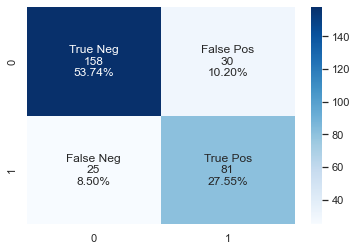

<Figure size 432x288 with 0 Axes>

In [88]:
analyze_dataset(X_cleveland, Y_cleveland, X_hungarian, Y_hungarian, lin_params, log_params, svm_params, nn_params, True, True, True)

## Neural Network Classifier - using PyTorch

We use PyTorch for graphically visualizing cost function trajectory over iterations.

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
# Split the data into training and validation sets
trainXnn, valXnn, trainYnn, valYnn = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
trainXnn = scaler.fit_transform(trainXnn)
valXnn = scaler.transform(valXnn)

In [94]:
# Convert data to PyTorch tensors
trainXnn = torch.tensor(trainXnn, dtype=torch.float32)
trainYnn = torch.tensor(trainYnn, dtype=torch.float32)
valXnn = torch.tensor(valXnn, dtype=torch.float32)
valYnn = torch.tensor(valYnn, dtype=torch.float32)

# Create DataLoader objects
train_dataset = TensorDataset(trainXnn, trainYnn)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(valXnn, valYnn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [99]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(trainXnn.shape[1], 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = Net().to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 2000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0

    # Training phase
    net.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.squeeze()

        optimizer.zero_grad()
        outputs = net(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation phase
    net.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.squeeze()
            
            outputs = net(inputs).squeeze()
            loss = criterion(outputs, targets)

            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

Epoch: 0, Training Loss: 0.6631, Validation Loss: 0.6542
Epoch: 100, Training Loss: 0.2650, Validation Loss: 0.3745
Epoch: 200, Training Loss: 0.2154, Validation Loss: 0.4171
Epoch: 300, Training Loss: 0.1796, Validation Loss: 0.4689
Epoch: 400, Training Loss: 0.1471, Validation Loss: 0.5319
Epoch: 500, Training Loss: 0.1360, Validation Loss: 0.5946
Epoch: 600, Training Loss: 0.1152, Validation Loss: 0.6648
Epoch: 700, Training Loss: 0.0937, Validation Loss: 0.7461
Epoch: 800, Training Loss: 0.0834, Validation Loss: 0.8440
Epoch: 900, Training Loss: 0.0736, Validation Loss: 0.9172
Epoch: 1000, Training Loss: 0.0659, Validation Loss: 2.5470
Epoch: 1100, Training Loss: 0.0595, Validation Loss: 2.6299
Epoch: 1200, Training Loss: 0.0542, Validation Loss: 2.7010
Epoch: 1300, Training Loss: 0.0522, Validation Loss: 3.2789
Epoch: 1400, Training Loss: 0.0489, Validation Loss: 3.3311
Epoch: 1500, Training Loss: 0.0463, Validation Loss: 3.3939
Epoch: 1600, Training Loss: 0.0404, Validation Loss:

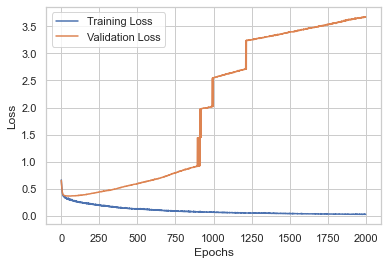

In [100]:
# Plot the cost function trajectory over iterations
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [118]:
# Testing phase
X_test = X_test.astype(np.float32)
X_test_nn = torch.tensor(X_test, dtype=torch.float32).to(device)
testY_pred_nn = net(X_test_nn).squeeze().cpu().detach().numpy()
testY_pred_nn_binary = (testY_pred_nn >= 0.5).astype(int)

# Calculate and print the evaluation metrics
print_classification_metrics(Y_test, testY_pred_nn_binary)

Accuracy: 0.7120
Precision: 0.7470
Recall: 0.6596
F1 Score: 0.7006
ROC AUC Score: 0.7131


Next, we do hyperparameter optimization for Neural Network:

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_function, alpha):
        super(SimpleNN, self).__init__()

        layers = []
        previous_size = input_size
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(previous_size, size))
            layers.append(activation_function)
            previous_size = size

        layers.append(nn.Linear(previous_size, output_size))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
def create_nn_model(hidden_layer_sizes, activation, solver, alpha, learning_rate):
    # Convert activation string to corresponding PyTorch activation function
    activation_mapping = {
        'identity': torch.nn.Identity(),
        'logistic': torch.nn.Sigmoid(),
        'tanh': torch.nn.Tanh(),
        'relu': torch.nn.ReLU()
    }
    activation_function = activation_mapping[activation]

    # Create the model
    model = SimpleNN(input_size, hidden_layer_sizes, output_size, activation_function, alpha)

    # Set the optimizer
    optimizer_mapping = {
        'adam': torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha),
        'sgd': torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=alpha)
    }
    optimizer = optimizer_mapping[solver]

    # Set the learning rate scheduler (optional)
    learning_rate_schedule_mapping = {
        'constant': torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=1),
        'invscaling': torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
        'adaptive': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)
    }
    scheduler = learning_rate_schedule_mapping[learning_rate]

    return model, optimizer, scheduler

In [ ]:
def train_nn_model(model, optimizer, scheduler, train_loader, val_loader, epochs=100, device="cpu"):
    criterion = nn.BCELoss()
    model.to(device)
    model.train()
    
    # Initialize the running_loss variable
    running_loss = 0

    for epoch in range(epochs):
        # Training loop
        for batch in train_loader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Unsqueeze targets to match output shape
            targets = targets.unsqueeze(1)

            # Calculate loss
            loss = criterion(outputs, targets)

            # Backward pass
            loss.backward()

            # Optimize
            optimizer.step()

            running_loss += loss.item()


        # Validation step
        model.eval()
        val_running_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Unsqueeze labels to match output shape
            labels = labels.unsqueeze(1)

            with torch.no_grad():
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            val_running_loss += loss.item()

        scheduler.step(val_running_loss)

        print(f'Epoch: {epoch+1}, Training Loss: {running_loss / len(train_loader)}, Validation Loss: {val_running_loss / len(val_loader)}')

    print('Finished Training')


In [ ]:
import optuna

def objective(trial):
    # Suggest hyperparameters
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(1,), (2,), (1, 1), (2, 2)])
    activation_function = trial.suggest_categorical('activation', [nn.Identity(), nn.Sigmoid(), nn.Tanh(), nn.ReLU()])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
    alpha = trial.suggest_float('alpha', 0.0001, 0.01)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

    input_size = trainX_fully_preprocessed.shape[1]
    output_size = 1

    # Create the model with suggested hyperparameters
    model = SimpleNN(input_size, hidden_layer_sizes, output_size, activation_function, alpha)

    # Create the optimizer
    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)
    elif optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=alpha)

    # Create the learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.1)

    # Train the model
    train_nn_model(model, optimizer, scheduler, train_loader, val_loader, epochs=100)

    # Make predictions on the validation set
    model.eval()
    val_preds = []
    val_true = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = (outputs >= 0.5).cpu().numpy().astype(int)
            val_preds.extend(preds)
            val_true.extend(targets.cpu().numpy())
    
    valY_pred_nn_binary = np.array(val_preds).reshape(-1)
    valY_binary = np.array(val_true).reshape(-1)

    # Calculate the negative accuracy to minimize
    neg_accuracy = -accuracy_score(valY_binary, valY_pred_nn_binary)

    return neg_accuracy

# Create a study and run optimization
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the corresponding negative accuracy
best_params = study.best_params
best_value = study.best_value
print(f'Best hyperparameters: {best_params}')
print(f'Best negative accuracy: {best_value}')

# Train the model with the best hyperparameters on the full training set
best_model = create_nn_model(*best_params.values())
train_nn_model(best_model, trainX_fully_preprocessed, trainY_binary)

# Make predictions on the test set
testY_pred_nn = best_model(torch.tensor(testX_fully_preprocessed, dtype=torch.float32)).detach().numpy()
testY_pred_nn_binary = (testY_pred_nn >= 0.5).astype(int)

# Calculate and print the evaluation metrics
print_classification_metrics(testY_binary, testY_pred_nn_binary)


## Feature selection for model accuracy improvement

print(trainX_fully_preprocessed_cl)
print(testX_fully_preprocessed_cl)
print(trainY_binary_cl)
print(testY_binary_cl)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression